In [45]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve
import tensorflow as tf
from tensorflow import keras

Loading the dataset

In [2]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Structure of dataset

In [ ]:
df.shape

Missing values

In [ ]:
df.isnull().sum()

Checking by rows

In [ ]:
df.isnull().any(axis=1)

**Encoding categorical data**

Label encoding

In [ ]:
columns=["gender","Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingMovies","Contract","PaperlessBilling","StreamingTV","PaymentMethod","Churn","InternetService","OnlineSecurity"]
label_encoder = LabelEncoder()
for i in columns:
  df[i]=label_encoder.fit_transform(df[i])

In [20]:
df_encoded = pd.get_dummies(df, columns=columns)
#print(df_encoded)
print(list(df_encoded.columns))

['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_0', 'gender_1', 'Partner_0', 'Partner_1', 'Dependents_0', 'Dependents_1', 'PhoneService_0', 'PhoneService_1', 'MultipleLines_0', 'MultipleLines_1', 'MultipleLines_2', 'OnlineSecurity_0', 'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1', 'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1', 'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1', 'TechSupport_2', 'StreamingMovies_0', 'StreamingMovies_1', 'StreamingMovies_2', 'Contract_0', 'Contract_1', 'Contract_2', 'PaperlessBilling_0', 'PaperlessBilling_1', 'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2', 'PaymentMethod_0', 'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3', 'Churn_0', 'Churn_1', 'InternetService_0', 'InternetService_1', 'InternetService_2', 'OnlineSecurity_0', 'OnlineSecurity_1', 'OnlineSecurity_2']


## **Logistic Regression**

Splitting the dataset (80%-train, 20%-test)

In [ ]:
target_column = "Churn_1"
feature_columns = ['SeniorCitizen','gender_0', 'gender_1', 'Partner_0', 'Partner_1', 'Dependents_0', 'Dependents_1',
                   'PhoneService_0', 'PhoneService_1', 'MultipleLines_0', 'MultipleLines_1', 'MultipleLines_2',
                   'OnlineSecurity_0', 'OnlineSecurity_1', 'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
                   'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1', 'DeviceProtection_2',
                   'TechSupport_0', 'TechSupport_1', 'TechSupport_2', 'StreamingMovies_0', 'StreamingMovies_1',
                   'StreamingMovies_2', 'Contract_0', 'Contract_1', 'Contract_2', 'PaperlessBilling_0',
                   'PaperlessBilling_1', 'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2', 'PaymentMethod_0',
                   'PaymentMethod_1', 'PaymentMethod_2', 'PaymentMethod_3', 'Churn_0', 'Churn_1', 'InternetService_0',
                   'InternetService_1', 'InternetService_2', 'OnlineSecurity_0', 'OnlineSecurity_1', 'OnlineSecurity_2']
X = df_encoded[feature_columns]
y = df_encoded[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

*its divides in (5634-1409) 2 dataset.*

Building and training model

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred
print (y_pred,y_test)

Model evaluation and testing

In [ ]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

#Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

#F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.2f}")

#ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc:.2f}")

#Cohen's Kappa Score
cohen_kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {cohen_kappa:.2f}")

#Matthews Correlation Coefficient
matthews_corrcoef_value = matthews_corrcoef(y_test, y_pred)
print(f"Matthews Correlation Coefficient: {matthews_corrcoef_value:.2f}")

confusion matrix visualization.

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

In [ ]:
#visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plotting ROC curve and finding AUC

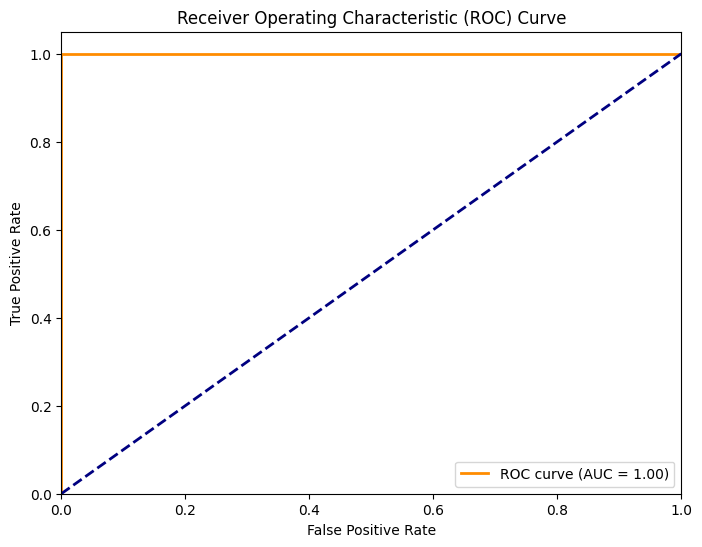

In [41]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Visualizing the precision-recall curve.

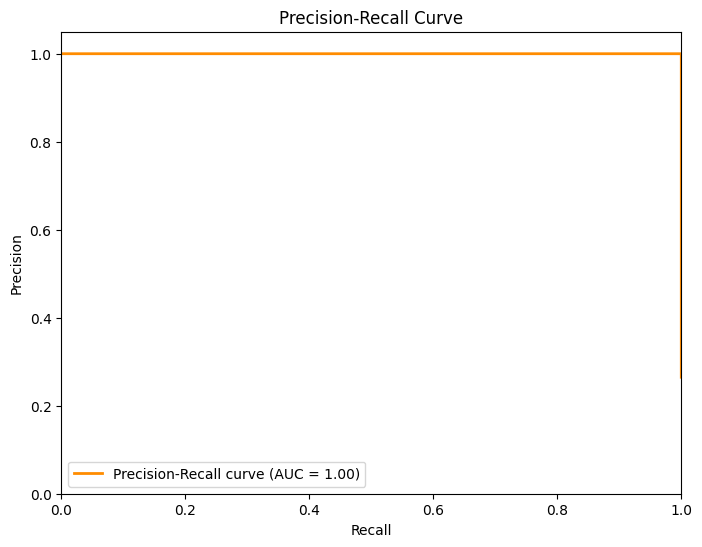

In [44]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

plotting log function

In [ ]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Log Loss')
plt.plot(history.history['val_loss'], label='Validation Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.title('Log Loss During Training')
plt.show()